In [1]:
import os
import pdb
import pathlib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [2]:
root = os.path.dirname(os.getcwd())
print(root)


import importlib

sys.path.append('../src/codebase')


/home/t-daalv/workspace/MCE


In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [106]:
outdir = '../src/out/ets/'

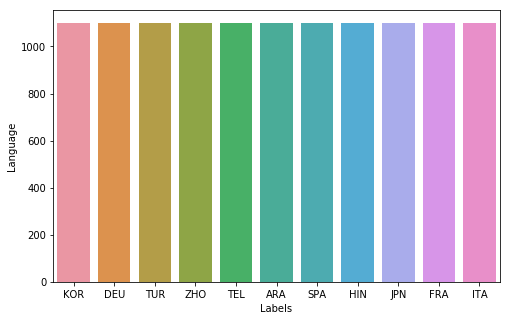

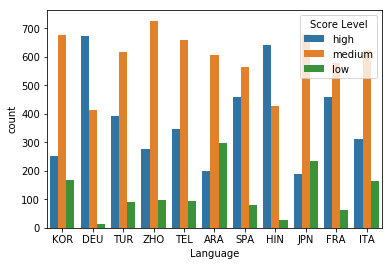

In [4]:
import pandas as pd
import seaborn as sns

# use pathlib to load path
data_root = pathlib.Path(root + '/data/ETS/data/text/')
df = pd.read_csv(data_root/'index.csv', error_bad_lines=False, header =0)
df.describe()
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x=df.Language.unique(),y=df.Language.value_counts());
ax.set(xlabel='Labels')
plt.show()


sns.countplot(x="Language",hue="Score Level", data = df)
plt.show()

In [5]:
# from torchtext import data as tntdata
# import spacy


import main_ets
importlib.reload(main_ets)
from main_ets import get_ets_data

embdim    = 300

train_loader, val_loader, test_loader, train_tds, val_tds, test_tds, vocab, langs = get_ets_data(
    embeddings = 'glove-{}'.format(str(embdim)) , debug = False)

Dataset size: 9899/1100/1100 (Train, valid, test)
Vocabulary size:  52633
Number of languages: 11, ARA / DEU / FRA / HIN / ITA / JPN / KOR / SPA / TUR / ZHO / TEL
Embedding size:  300


In [6]:
print(train_loader.dataset.examples[0].text[:10])
print(train_loader.dataset.examples[0].label)

print(test_loader.dataset.examples[0].text[:10])
print(test_loader.dataset.examples[0].label)

[' ', 'with', 'the', 'rapid', 'growth', 'of', 'our', 'civilization', ',', 'more']
ZHO
['young', 'people', 'nowadays', 'do', 'not', 'give', 'enough', 'time', 'to', 'helping']
DEU


In [7]:
from nltk import ngrams
from collections import defaultdict

n = 5

class_freqs = defaultdict(list)

#example = train_loader.dataset.examples[0]

for example in train_loader.dataset:
    #print(example.label)
    grams = ngrams(example.text, n)
    for gram in grams:
        class_freqs[gram].append(example.label)

In [8]:
len(class_freqs.keys())

3060962

In [9]:
# Show some ngrams that have frequently in one language, but never in any other
tot = 0 
for k,v in class_freqs.items():
    if len(v) > 4 and len(set(v)) == 1:
        print(k,v)

('two', 'reasons', 'why', 'i', 'agree') ['JPN', 'JPN', 'JPN', 'JPN', 'JPN']
('time', 'to', 'the', 'communities', '.') ['ZHO', 'ZHO', 'ZHO', 'ZHO', 'ZHO']
('.', 'it', 'is', 'generally', 'agreed') ['KOR', 'KOR', 'KOR', 'KOR', 'KOR']
('.', 'all', 'things', 'considered', ',') ['KOR', 'KOR', 'KOR', 'KOR', 'KOR']
(' ', 'to', 'conclude', 'we', 'can') ['FRA', 'FRA', 'FRA', 'FRA', 'FRA']
('products', 'that', 'seem', 'to', 'be') ['SPA', 'SPA', 'SPA', 'SPA', 'SPA', 'SPA']
('my', 'country', ',', 'turkey', ',') ['TUR', 'TUR', 'TUR', 'TUR', 'TUR']
('to', 'give', 'an', 'example', 'from') ['TUR', 'TUR', 'TUR', 'TUR', 'TUR']
('.', ' ', 'to', 'come', 'to') ['DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU']
('everything', 'there', 'is', 'to', 'know') ['SPA', 'SPA', 'SPA', 'SPA', 'SPA', 'SPA']
('there', 'is', 'to', 'know', 'about') ['SPA', 'SPA', 'SPA', 'SPA', 'SPA', 'SPA', 'SPA']
('in', 'the', 'rusting', 'of', 'iron') ['HIN', 'HIN', 'HIN', 'HIN', 'HIN']
('.', 'specialization', 'in', 'one', 'subject') ['TE

('for', 'example', ',', 'in', 'korea') ['KOR', 'KOR', 'KOR', 'KOR', 'KOR']
('example', ',', 'in', 'korea', ',') ['KOR', 'KOR', 'KOR', 'KOR', 'KOR']
('are', 'listed', 'as', 'follows', '.') ['ZHO', 'ZHO', 'ZHO', 'ZHO', 'ZHO']
('listed', 'as', 'follows', '.', ' ') ['ZHO', 'ZHO', 'ZHO', 'ZHO', 'ZHO']
('when', 'i', 'was', 'middle', 'school') ['KOR', 'KOR', 'KOR', 'KOR', 'KOR']
('on', 'the', 'one', 'hand', 'i') ['DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU']
('but', 'in', 'my', 'opinion', 'this') ['DEU', 'DEU', 'DEU', 'DEU', 'DEU']
('taking', 'all', 'aspects', 'into', 'account') ['FRA', 'FRA', 'FRA', 'FRA', 'FRA']
('try', 'for', 'new', 'things', 'and') ['TEL', 'TEL', 'TEL', 'TEL', 'TEL']
('.', 'if', 'you', 'just', 'know') ['ZHO', 'ZHO', 'ZHO', 'ZHO', 'ZHO']
('the', 'opinion', 'that', 'in', 'twenty') ['JPN', 'JPN', 'JPN', 'JPN', 'JPN']
(' ', 'taking', 'into', 'account', 'of') ['ZHO', 'ZHO', 'ZHO', 'ZHO', 'ZHO']
('taking', 'into', 'account', 'of', 'all') ['ZHO', 'ZHO', 'ZHO', 'ZHO', 'ZHO', 'ZHO']
(

In [10]:
print(k)
print(train_tds.fields['text'].process([k], device = -1, train = False))
print(v[0])
print(train_tds.fields['label'].process([v[0]], device = -1, train = False))


('get', 'a', 'good', 'result', '.')
(tensor([[   2,   97,   11,   87,  348,    5,    3]]), tensor([ 7]))
FRA
tensor([ 2])


In [11]:
train_tds.fields['label'].vocab.itos

['ARA', 'DEU', 'FRA', 'HIN', 'ITA', 'JPN', 'KOR', 'SPA', 'TUR', 'ZHO', 'TEL']

In [12]:
len(train_tds)

9899

In [13]:
# Get a batch for experiments and viz
batch = next(iter(val_loader))

batch_x, batch_x_lens = batch.text
batch_y = batch.label

print(batch_x.shape, batch_x_lens.shape)
print(batch_y.shape)

torch.Size([256, 311]) torch.Size([256])
torch.Size([256])


In [14]:
A = torch.tensor([[1.,2,3,2,2,0],[1.,2,3,2,2,0]])
torch.histc(A, bins = 4, min=0,max=4)

tensor([ 2.,  2.,  6.,  2.])

In [107]:
#torch.bincount(A) # only more recent pytorch?


### Load Classifier

In [16]:
# If cpu
#classifier = torch.load("../src/checkpoints/ets/classif.pth")

import models
importlib.reload(models)
from models import ets_classifier

classifier = ets_classifier.load("../src/checkpoints/ets/classif.gpu.pth")

# classifier.test(train_loader)
# classifier.test(test_loader)

In [17]:
output = classifier(batch_x,  batch_x_lens)
#print(output)
p, pred = output.max(1)

print(100*(pred == batch_y).sum().item()/len(pred))


46.484375


### Load masked model

In [18]:
importlib.reload(models)
from models import masked_text_classifier
mask_model = masked_text_classifier.load("../src/checkpoints/ets/mask_model_5.gpu.pth")

In [19]:
sent = "in my country germany".split()
print(sent)
sent_idx = train_tds.fields['text'].numericalize(([sent],[]), device = -1)[0]
print(sent_idx)

out = mask_model(sent_idx)
print(out)
p, pred = out.max(1)
print(p.item(), langs[pred])

['in', 'my', 'country', 'germany']
tensor([[   10,    47,   245,  1444]])
tensor([[ 0.1343,  0.1062,  0.0969,  0.1327,  0.1265,  0.0890,  0.0970,
          0.1255,  0.1233,  0.0981,  0.0923]])
0.13432112336158752 ARA


0.9966379404067993

### Instatiate Explainer

True label: ARA
Predicted label: ARA (p =     1.00)
Best objective:  -0.0000, (i =  0)
Best objective:  -0.0000, (i =  0)
Best objective:  -0.0000, (i = 12)
Best objective:   0.1904, (i = 200)
Best objective:   0.6422, (i = 101)
Done!


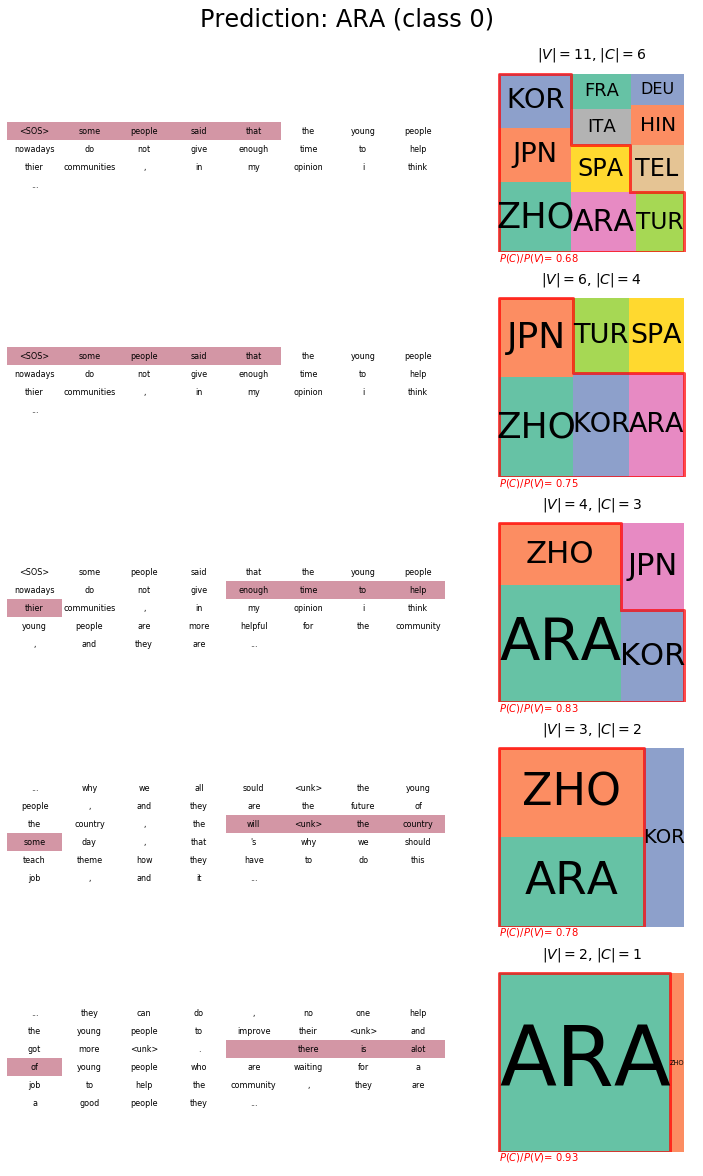

In [159]:
import utils
importlib.reload(utils)

import attrib_optim
importlib.reload(attrib_optim)
from attrib_optim import MCExplainer

crit_alpha = 1
crit_p = 2
Exp = MCExplainer(classifier, mask_model, classes = langs, crit_alpha = crit_alpha,
                  crit_p = crit_p, plot_type = 'treemap')


# Correct pred: 3, 5, 11
# Incorrect but close: 9
idx = 15
x_len = batch_x_lens[idx:idx+1]
x  = batch_x[idx:idx+1]
print('True label:', langs[batch_y[idx].item()])
fx = classifier(x, x_len)
p, pred = fx.max(1)
p = F.softmax(fx).max().item()
print('Predicted label: {} (p = {:8.2f})'.format(langs[pred.item()], p))
x = x[:,:x_len]



e = Exp.explain(x, pred.item(), verbose = 0 , show_plot = 0)
save_path = None
save_path = os.path.join(outdir, 'expl_id-{}_alpha-{}.pdf'.format(idx, crit_alpha, crit_p))
e.plot(save_path = save_path)

### Now, shorter explanation for same pred

True label: ARA
Predicted label: ARA (p =     1.00)
Best objective:  -0.1836, (i = 101)
Done!


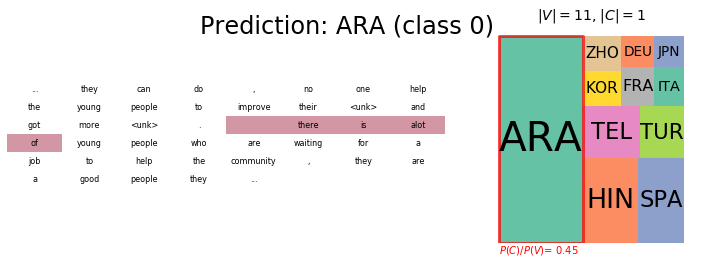

In [160]:

crit_alpha = .1
crit_p = 2
Exp = MCExplainer(classifier, mask_model, classes = langs, crit_alpha = crit_alpha,
                  crit_p = crit_p, plot_type = 'treemap')

x_len = batch_x_lens[idx:idx+1]
x  = batch_x[idx:idx+1]
print('True label:', langs[batch_y[idx].item()])
fx = classifier(x, x_len)
p, pred = fx.max(1)
p = F.softmax(fx).max().item()
print('Predicted label: {} (p = {:8.2f})'.format(langs[pred.item()], p))
x = x[:,:x_len]



e = Exp.explain(x, pred.item(), verbose = 0 , show_plot = 0)
save_path = None
save_path = os.path.join(outdir, 'expl_id-{}_alpha-{}.pdf'.format(idx, crit_alpha, crit_p))
e.plot(save_path = save_path)


### Trash

In [104]:
import numpy as np
for k,v in freqs.items():
    hist = np.histogram(v, bins=range(self.nclasses+1))[0] #, 1, Classes)#.numpy())
    break

NameError: name 'self' is not defined

In [109]:
print(len(langs))
print(v)
np.histogram(v, bins = range(len(langs) + 1))


11
[tensor([ 9])]


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [ ]:
def _generate_knn_index(self, loader):
    ### 1. Compute n-grams and get their label freqs
    



In [335]:
import models
importlib.reload(models)
from models import ets_classifier


hidden_dim = 150
nclasses   = 11

model = ets_classifier(vocab, langs, hidden_dim = hidden_dim)


Using pretrained word embeddings


Train Epoch: 1 [0/9899 (0%)]	Loss: 0.597834
Train Epoch: 1 [320/9899 (3%)]	Loss: 0.827234
Train Epoch: 1 [640/9899 (6%)]	Loss: 0.542127
Train Epoch: 1 [960/9899 (10%)]	Loss: 0.857597
Train Epoch: 1 [1280/9899 (13%)]	Loss: 0.713647
Train Epoch: 1 [1600/9899 (16%)]	Loss: 1.008044
Train Epoch: 1 [1920/9899 (19%)]	Loss: 0.486856
Train Epoch: 1 [2240/9899 (23%)]	Loss: 0.496054
Train Epoch: 1 [2560/9899 (26%)]	Loss: 0.617364
Train Epoch: 1 [2880/9899 (29%)]	Loss: 0.560815
Train Epoch: 1 [3200/9899 (32%)]	Loss: 0.667471
Train Epoch: 1 [3520/9899 (35%)]	Loss: 0.595999
Train Epoch: 1 [3840/9899 (39%)]	Loss: 0.423508
Train Epoch: 1 [4160/9899 (42%)]	Loss: 0.807825
Train Epoch: 1 [4480/9899 (45%)]	Loss: 0.548832
Train Epoch: 1 [4800/9899 (48%)]	Loss: 0.301254
Train Epoch: 1 [5120/9899 (52%)]	Loss: 0.596266
Train Epoch: 1 [5440/9899 (55%)]	Loss: 0.747283
Train Epoch: 1 [5760/9899 (58%)]	Loss: 0.523762
Train Epoch: 1 [6080/9899 (61%)]	Loss: 0.414238
Train Epoch: 1 [6400/9899 (65%)]	Loss: 0.523077
T

/home/t-daalv/.ve/MCE/lib/python3.6/site-packages/torchtext/data/field.py:321: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train), lengths
/home/t-daalv/.ve/MCE/lib/python3.6/site-packages/torchtext/data/field.py:322: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train)



Test set: Average loss: 2.1185, Accuracy: 434/1099 (39%)

Confusion matrix, without normalization
[[36  6  8  6  2  1  1  7 30  1  2]
 [ 1 49 26  1  6  1  1  1 13  1  0]
 [ 0 25 45  0 11  3  0  4 12  0  0]
 [ 5  7  0 36  0  0  0  3 26  1 22]
 [ 0 14 27  0 50  0  0  5  4  0  0]
 [ 2  2  6  0  0 36 18  9 12 14  0]
 [ 8  1  0  0  0 26 27  0 17 21  0]
 [13 11 18  1 14  1  1 25 14  2  0]
 [11 15  5  5  3  0  1  5 50  4  1]
 [ 4  2  6  0  1  5 22  7 25 28  0]
 [ 6  0  1 26  1  0  0  0 14  0 52]]


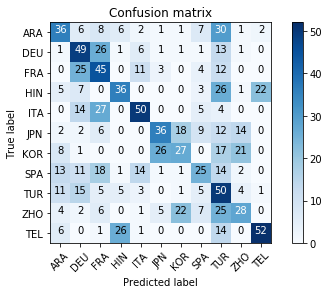

Train Epoch: 2 [0/9899 (0%)]	Loss: 0.265266
Train Epoch: 2 [320/9899 (3%)]	Loss: 0.203106
Train Epoch: 2 [640/9899 (6%)]	Loss: 0.278172
Train Epoch: 2 [960/9899 (10%)]	Loss: 0.160346
Train Epoch: 2 [1280/9899 (13%)]	Loss: 0.209025
Train Epoch: 2 [1600/9899 (16%)]	Loss: 0.180033
Train Epoch: 2 [1920/9899 (19%)]	Loss: 0.405086
Train Epoch: 2 [2240/9899 (23%)]	Loss: 0.228961
Train Epoch: 2 [2560/9899 (26%)]	Loss: 0.196916
Train Epoch: 2 [2880/9899 (29%)]	Loss: 0.215097
Train Epoch: 2 [3200/9899 (32%)]	Loss: 0.238309
Train Epoch: 2 [3520/9899 (35%)]	Loss: 0.193958
Train Epoch: 2 [3840/9899 (39%)]	Loss: 0.243516
Train Epoch: 2 [4160/9899 (42%)]	Loss: 0.462278
Train Epoch: 2 [4480/9899 (45%)]	Loss: 0.414178
Train Epoch: 2 [4800/9899 (48%)]	Loss: 0.239920
Train Epoch: 2 [5120/9899 (52%)]	Loss: 0.119311
Train Epoch: 2 [5440/9899 (55%)]	Loss: 0.256653
Train Epoch: 2 [5760/9899 (58%)]	Loss: 0.472281
Train Epoch: 2 [6080/9899 (61%)]	Loss: 0.085338
Train Epoch: 2 [6400/9899 (65%)]	Loss: 0.249162
T

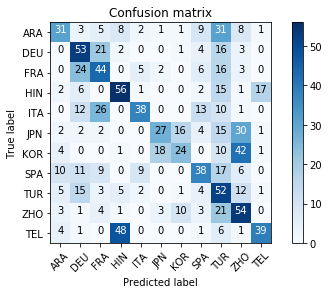

Train Epoch: 3 [0/9899 (0%)]	Loss: 0.105248
Train Epoch: 3 [320/9899 (3%)]	Loss: 0.048297
Train Epoch: 3 [640/9899 (6%)]	Loss: 0.045021
Train Epoch: 3 [960/9899 (10%)]	Loss: 0.199560
Train Epoch: 3 [1280/9899 (13%)]	Loss: 0.107124
Train Epoch: 3 [1600/9899 (16%)]	Loss: 0.185065
Train Epoch: 3 [1920/9899 (19%)]	Loss: 0.125174
Train Epoch: 3 [2240/9899 (23%)]	Loss: 0.099770
Train Epoch: 3 [2560/9899 (26%)]	Loss: 0.072314
Train Epoch: 3 [2880/9899 (29%)]	Loss: 0.141566
Train Epoch: 3 [3200/9899 (32%)]	Loss: 0.185056
Train Epoch: 3 [3520/9899 (35%)]	Loss: 0.858679
Train Epoch: 3 [3840/9899 (39%)]	Loss: 0.229225
Train Epoch: 3 [4160/9899 (42%)]	Loss: 0.178949
Train Epoch: 3 [4480/9899 (45%)]	Loss: 0.049960
Train Epoch: 3 [4800/9899 (48%)]	Loss: 0.254326
Train Epoch: 3 [5120/9899 (52%)]	Loss: 0.126152
Train Epoch: 3 [5440/9899 (55%)]	Loss: 0.111879
Train Epoch: 3 [5760/9899 (58%)]	Loss: 0.048922
Train Epoch: 3 [6080/9899 (61%)]	Loss: 0.203759
Train Epoch: 3 [6400/9899 (65%)]	Loss: 0.145580
T

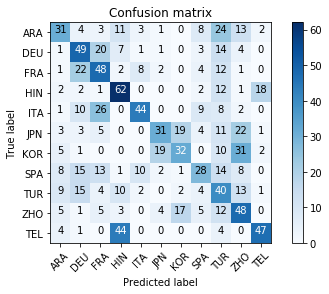

Train Epoch: 4 [0/9899 (0%)]	Loss: 0.103982
Train Epoch: 4 [320/9899 (3%)]	Loss: 0.109194
Train Epoch: 4 [640/9899 (6%)]	Loss: 0.025954
Train Epoch: 4 [960/9899 (10%)]	Loss: 0.018121
Train Epoch: 4 [1280/9899 (13%)]	Loss: 0.042545
Train Epoch: 4 [1600/9899 (16%)]	Loss: 0.010118
Train Epoch: 4 [1920/9899 (19%)]	Loss: 0.016720
Train Epoch: 4 [2240/9899 (23%)]	Loss: 0.115697
Train Epoch: 4 [2560/9899 (26%)]	Loss: 0.052726
Train Epoch: 4 [2880/9899 (29%)]	Loss: 0.031614
Train Epoch: 4 [3200/9899 (32%)]	Loss: 0.095515
Train Epoch: 4 [3520/9899 (35%)]	Loss: 0.055440
Train Epoch: 4 [3840/9899 (39%)]	Loss: 0.019383
Train Epoch: 4 [4160/9899 (42%)]	Loss: 0.024994
Train Epoch: 4 [4480/9899 (45%)]	Loss: 0.097432
Train Epoch: 4 [4800/9899 (48%)]	Loss: 0.011267
Train Epoch: 4 [5120/9899 (52%)]	Loss: 0.048576
Train Epoch: 4 [5440/9899 (55%)]	Loss: 0.057876
Train Epoch: 4 [5760/9899 (58%)]	Loss: 0.056422
Train Epoch: 4 [6080/9899 (61%)]	Loss: 0.063706
Train Epoch: 4 [6400/9899 (65%)]	Loss: 0.166711
T

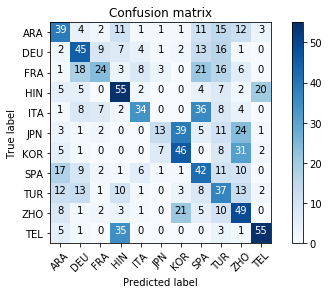

Train Epoch: 5 [0/9899 (0%)]	Loss: 0.056327
Train Epoch: 5 [320/9899 (3%)]	Loss: 0.042131
Train Epoch: 5 [640/9899 (6%)]	Loss: 0.027836
Train Epoch: 5 [960/9899 (10%)]	Loss: 0.012850
Train Epoch: 5 [1280/9899 (13%)]	Loss: 0.015522
Train Epoch: 5 [1600/9899 (16%)]	Loss: 0.012828
Train Epoch: 5 [1920/9899 (19%)]	Loss: 0.016251
Train Epoch: 5 [2240/9899 (23%)]	Loss: 0.010746
Train Epoch: 5 [2560/9899 (26%)]	Loss: 0.007912
Train Epoch: 5 [2880/9899 (29%)]	Loss: 0.014786
Train Epoch: 5 [3200/9899 (32%)]	Loss: 0.018272
Train Epoch: 5 [3520/9899 (35%)]	Loss: 0.011107
Train Epoch: 5 [3840/9899 (39%)]	Loss: 0.007568
Train Epoch: 5 [4160/9899 (42%)]	Loss: 0.005958
Train Epoch: 5 [4480/9899 (45%)]	Loss: 0.006963
Train Epoch: 5 [4800/9899 (48%)]	Loss: 0.006762
Train Epoch: 5 [5120/9899 (52%)]	Loss: 0.014974
Train Epoch: 5 [5440/9899 (55%)]	Loss: 0.075364
Train Epoch: 5 [5760/9899 (58%)]	Loss: 0.026014
Train Epoch: 5 [6080/9899 (61%)]	Loss: 0.011380
Train Epoch: 5 [6400/9899 (65%)]	Loss: 0.038082
T

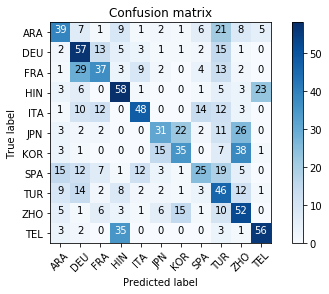


Test set: Average loss: 8.4663, Accuracy: 69/1099 (6%)

Confusion matrix, without normalization
[[ 69 143  57 142  81  76  59  74 157 168  73]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]


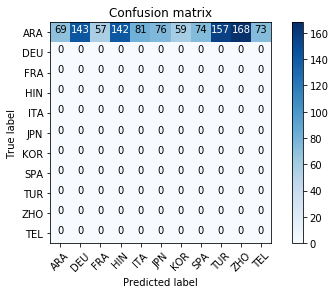

In [337]:
model.train(train_loader, val_loader, epochs = 5)


In [ ]:
ngram_size = (5)

## If cpu
#mask_model = torch.load("../src/checkpoints/mnist/mask_model_{}.pth".format(ngram_size))

# If gpu
mask_model = torch.load("../src/checkpoints/ets/mask_model_{}.gpu.pth".format(ngram_size),
                        map_location=lambda storage, location: storage)


In [ ]:
model.test(test_loader)

/home/t-daalv/.ve/MCE/lib/python3.6/site-packages/torchtext/data/field.py:321: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train), lengths
/home/t-daalv/.ve/MCE/lib/python3.6/site-packages/torchtext/data/field.py:322: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train)



Test set: Average loss: 3.1252, Accuracy: 446/1099 (41%)

[[37  1  6  3  1  0  3  6 13 26  4]
 [ 4 41 27  2  4  0  0  1 12  9  0]
 [ 4 19 43  1  7  1  0  6  9 10  0]
 [ 7  5  3 43  0  0  0  0 23  1 18]
 [ 0  9 27  1 45  0  0 11  3  4  0]
 [ 4  0  4  0  0 25 15  1  4 46  0]
 [ 2  0  0  0  0 14 30  0 11 43  0]
 [ 6  9 10  0 12  0  0 40  4 19  0]
 [ 7 15  5  3  1  0  5  4 35 22  3]
 [ 3  3  4  0  1 10  4  3 13 59  0]
 [ 6  3  1 25  1  0  1  0 13  2 48]]
> <ipython-input-287-0adbab8015a3>(62)test()
-> plot_confusion_matrix(conf.value(), LABEL.vocab.itos)
(Pdb) c
Confusion matrix, without normalization
[[37  1  6  3  1  0  3  6 13 26  4]
 [ 4 41 27  2  4  0  0  1 12  9  0]
 [ 4 19 43  1  7  1  0  6  9 10  0]
 [ 7  5  3 43  0  0  0  0 23  1 18]
 [ 0  9 27  1 45  0  0 11  3  4  0]
 [ 4  0  4  0  0 25 15  1  4 46  0]
 [ 2  0  0  0  0 14 30  0 11 43  0]
 [ 6  9 10  0 12  0  0 40  4 19  0]
 [ 7 15  5  3  1  0  5  4 35 22  3]
 [ 3  3  4  0  1 10  4  3 13 59  0]
 [ 6  3  1 25  1  0  1  0 13  2 48

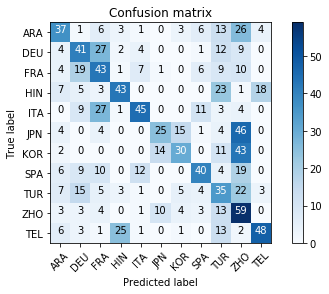

In [273]:
print(LABEL.vocab.itos)


['ARA', 'DEU', 'FRA', 'HIN', 'ITA', 'JPN', 'KOR', 'SPA', 'TUR', 'ZHO', 'TEL']


### TRASH

In [ ]:


#loss_function = nn.NLLLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Also, we need to clear out the hidden state of the LSTM,
        # detaching it from its history on the last instance.
        model.hidden = model.init_hidden()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)

    # The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
    # for word i. The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(tag_scores)

In [280]:
# train_iter, val_iter, test_iter = data.Iterator.splits(
#         (train, val, test), sort_key=lambda x: len(x.text),
#         batch_sizes=(32, 32, 32), device=-1, sort_within_batch=True)

train_iter, val_iter, test_iter = data.BucketIterator.splits(
        (train, val, test), sort_key=lambda x: len(x.text),
        batch_sizes=(32, 256, 256), device=-1, sort_within_batch=True, repeat = False)


TEXT.build_vocab(train, vectors="glove.6B.100d") # MOve to 2300d eventually
LABEL.build_vocab(train)
print(LABEL.vocab.itos)
print(LABEL.vocab.stoi)

['ARA', 'DEU', 'FRA', 'HIN', 'ITA', 'JPN', 'KOR', 'SPA', 'TUR', 'ZHO', 'TEL']
defaultdict(<function _default_unk_index at 0x7f2face691e0>, {'ARA': 0, 'DEU': 1, 'FRA': 2, 'HIN': 3, 'ITA': 4, 'JPN': 5, 'KOR': 6, 'SPA': 7, 'TUR': 8, 'ZHO': 9, 'TEL': 10})


In [281]:
class LSTMClassifier(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, vocab):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.nclasses   = tagset_size

        self.vocab = vocab 
        padding_idx = vocab.stoi['<PAD>']
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.encoder = nn.LSTM(embedding_dim, hidden_dim, batch_first = True)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(1, 1, self.hidden_dim),
                torch.zeros(1, 1, self.hidden_dim))

    def forward(self, inputs, lengths=None):
        """
            inputs: (seqlen, batch)
        """
        batch_size, seqlen = inputs.size()
        
        # 1. Embedding Layer
        #  (batch, seqlen) ->  (batch, seqlen, embdim)
        embeds = self.word_embeddings(inputs)
        
        # 2. Run through rnn
        # (batch, seqlen, embdim) -> (batch, seqlen, hiddendim)
        packed_emb = embeds
        if lengths is not None:
            lengths = lengths.view(-1).tolist()
            packed_emb = nn.utils.rnn.pack_padded_sequence(embeds, lengths, batch_first = True)
        output, self.hidden = self.encoder(packed_emb)  # embed_input

        # Undo unpacking
        if lengths is not None:
             output, _ = nn.utils.rnn.pad_packed_sequence(output, batch_first = True)
                
                
        # 3. Get last state
        time_dimension = 1 # since time_dim = (batch_first == 1)
        idx = (torch.LongTensor(lengths) - 1).view(-1, 1).expand(
            len(lengths), output.size(2))
        idx = idx.unsqueeze(time_dimension) # 1 is time dimension
        #print('idx', idx.shape)
        last_output = output.gather(time_dimension, idx).squeeze(time_dimension)
        
        #print('last', last_output.shape)
        # 4. Project to label space
        
        # (batch, seqlen, hiddendim) -> (batch*seqlen, hiddendim)
        #output = output.contiguous().view(-1, output.shape[2])

        # (batch*seqlen, hiddendim) -> (batch*seqlen, nclasses)
        tag_space = self.hidden2tag(last_output) #len(sentence), -1))

        # (batch*seqlen, nclasses) -> (batch, seqlen, nclasses)
        tag_scores =  F.log_softmax(tag_space, dim=1).view(batch_size, self.nclasses)

        return tag_scores
    

    
emb_dim = 100
hidden_dim = 150
nclasses = 11

model = LSTMClassifier(emb_dim, hidden_dim, len(vocab), nclasses, vocab = vocab)
model.word_embeddings.weight.data.copy_(vocab.vectors)


tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.3872, -1.0279, -0.1097,  ..., -0.3012, -0.2891,  0.3641],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [283]:
#optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_epoch(train_loader, epoch,log_interval = 5):
    model.train()
    for batch_idx, batch in enumerate(train_loader):
        (inputs, lengths), targets = batch.text, batch.label
        #print(inputs.shape)
        #(x, x_lengths), y = data.text, data.label
        model.zero_grad()
        model.hidden = model.init_hidden()

        pred_scores = model(inputs, lengths)
        #print(pred_scores.shape)
        loss = F.cross_entropy(pred_scores, targets)

        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        
epochs = 10
for epoch in range(epochs):
    train_epoch(train_iter, epoch, log_interval = 10)
    test(val_iter)

Train Epoch: 0 [0/9899 (0%)]	Loss: 2.390713
Train Epoch: 0 [320/9899 (3%)]	Loss: 2.400441
Train Epoch: 0 [640/9899 (6%)]	Loss: 2.458400
Train Epoch: 0 [960/9899 (10%)]	Loss: 2.432920
Train Epoch: 0 [1280/9899 (13%)]	Loss: 2.386073
Train Epoch: 0 [1600/9899 (16%)]	Loss: 2.383201
Train Epoch: 0 [1920/9899 (19%)]	Loss: 2.401952
Train Epoch: 0 [2240/9899 (23%)]	Loss: 2.395075
Train Epoch: 0 [2560/9899 (26%)]	Loss: 2.432596
Train Epoch: 0 [2880/9899 (29%)]	Loss: 2.418607
Train Epoch: 0 [3200/9899 (32%)]	Loss: 2.402121
Train Epoch: 0 [3520/9899 (35%)]	Loss: 2.404507
Train Epoch: 0 [3840/9899 (39%)]	Loss: 2.411219
Train Epoch: 0 [4160/9899 (42%)]	Loss: 2.373411
Train Epoch: 0 [4480/9899 (45%)]	Loss: 2.412518
Train Epoch: 0 [4800/9899 (48%)]	Loss: 2.416451
Train Epoch: 0 [5120/9899 (52%)]	Loss: 2.382829
Train Epoch: 0 [5440/9899 (55%)]	Loss: 2.376990
Train Epoch: 0 [5760/9899 (58%)]	Loss: 2.392330
Train Epoch: 0 [6080/9899 (61%)]	Loss: 2.376269
Train Epoch: 0 [6400/9899 (65%)]	Loss: 2.400207
T

/home/t-daalv/.ve/MCE/lib/python3.6/site-packages/torchtext/data/field.py:321: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train), lengths
/home/t-daalv/.ve/MCE/lib/python3.6/site-packages/torchtext/data/field.py:322: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(arr, volatile=not train)



Test set: Average loss: 2.3653, Accuracy: 145/1099 (13%)

[[ 1  0  0  6 14  1  0 72  0  3  3]
 [ 0  1  0  6 17  1  0 69  0  3  3]
 [ 1  0  2  2 24  2  0 62  0  4  3]
 [ 1  0  0 19 19  2  0 49  0  3  7]
 [ 0  1  0  5 17  1  0 71  0  2  3]
 [ 3  0  0  2  8  5  0 70  0  8  3]
 [ 3  0  1  4 12  3  0 65  0  2 10]
 [ 1  1  1  3 11  1  0 81  0  0  1]
 [ 4  0  0  9 17  0  0 59  0  2  9]
 [ 1  0  2  0 12  2  0 69  0  6  8]
 [ 2  0  0 21 12  1  0 48  0  3 13]]
Train Epoch: 1 [0/9899 (0%)]	Loss: 2.257063
Train Epoch: 1 [320/9899 (3%)]	Loss: 2.320282
Train Epoch: 1 [640/9899 (6%)]	Loss: 2.456083
Train Epoch: 1 [960/9899 (10%)]	Loss: 2.416103
Train Epoch: 1 [1280/9899 (13%)]	Loss: 2.325836
Train Epoch: 1 [1600/9899 (16%)]	Loss: 2.482314
Train Epoch: 1 [1920/9899 (19%)]	Loss: 2.478295
Train Epoch: 1 [2240/9899 (23%)]	Loss: 2.386399
Train Epoch: 1 [2560/9899 (26%)]	Loss: 2.464633
Train Epoch: 1 [2880/9899 (29%)]	Loss: 2.503685
Train Epoch: 1 [3200/9899 (32%)]	Loss: 2.288628
Train Epoch: 1 [3520/9899

Train Epoch: 5 [0/9899 (0%)]	Loss: 1.018244
Train Epoch: 5 [320/9899 (3%)]	Loss: 0.730627
Train Epoch: 5 [640/9899 (6%)]	Loss: 0.728806
Train Epoch: 5 [960/9899 (10%)]	Loss: 0.825112
Train Epoch: 5 [1280/9899 (13%)]	Loss: 0.852512
Train Epoch: 5 [1600/9899 (16%)]	Loss: 0.822282
Train Epoch: 5 [1920/9899 (19%)]	Loss: 1.141271
Train Epoch: 5 [2240/9899 (23%)]	Loss: 0.884846
Train Epoch: 5 [2560/9899 (26%)]	Loss: 0.793243
Train Epoch: 5 [2880/9899 (29%)]	Loss: 0.945948
Train Epoch: 5 [3200/9899 (32%)]	Loss: 0.965201
Train Epoch: 5 [3520/9899 (35%)]	Loss: 0.860450
Train Epoch: 5 [3840/9899 (39%)]	Loss: 0.750151
Train Epoch: 5 [4160/9899 (42%)]	Loss: 0.893597
Train Epoch: 5 [4480/9899 (45%)]	Loss: 1.028044
Train Epoch: 5 [4800/9899 (48%)]	Loss: 1.183112
Train Epoch: 5 [5120/9899 (52%)]	Loss: 0.926883
Train Epoch: 5 [5440/9899 (55%)]	Loss: 1.068118
Train Epoch: 5 [5760/9899 (58%)]	Loss: 1.080149
Train Epoch: 5 [6080/9899 (61%)]	Loss: 0.762960
Train Epoch: 5 [6400/9899 (65%)]	Loss: 0.556486
T

Train Epoch: 9 [3200/9899 (32%)]	Loss: 0.025569
Train Epoch: 9 [3520/9899 (35%)]	Loss: 0.131880
Train Epoch: 9 [3840/9899 (39%)]	Loss: 0.019534
Train Epoch: 9 [4160/9899 (42%)]	Loss: 0.026725
Train Epoch: 9 [4480/9899 (45%)]	Loss: 0.047660
Train Epoch: 9 [4800/9899 (48%)]	Loss: 0.105464
Train Epoch: 9 [5120/9899 (52%)]	Loss: 0.148425
Train Epoch: 9 [5440/9899 (55%)]	Loss: 0.233064
Train Epoch: 9 [5760/9899 (58%)]	Loss: 0.097368
Train Epoch: 9 [6080/9899 (61%)]	Loss: 0.013564
Train Epoch: 9 [6400/9899 (65%)]	Loss: 0.042677
Train Epoch: 9 [6720/9899 (68%)]	Loss: 0.053121
Train Epoch: 9 [7040/9899 (71%)]	Loss: 0.073113
Train Epoch: 9 [7360/9899 (74%)]	Loss: 0.009109
Train Epoch: 9 [7680/9899 (77%)]	Loss: 0.382409
Train Epoch: 9 [8000/9899 (81%)]	Loss: 0.102134
Train Epoch: 9 [8320/9899 (84%)]	Loss: 0.010898
Train Epoch: 9 [8640/9899 (87%)]	Loss: 0.022811
Train Epoch: 9 [8960/9899 (90%)]	Loss: 0.015867
Train Epoch: 9 [9280/9899 (94%)]	Loss: 0.022863
Train Epoch: 9 [9600/9899 (97%)]	Loss: 0